In [1]:
import gym
import gym_minigrid

from agents import PPOAgent
from utils import GAEtrain

In [2]:
# Environment
env = gym.make("MiniGrid-Empty-8x8-v0")  # Use "Switch4-v0" for the Switch-4 game
env.seed(0)
state_dim = env.observation_space['image'].shape
action_dim = env.action_space.n

# Agent Params
hidden_dim = 32
lr = 0.001
gamma = 0.99
lmbda = 0.95
clip = 0.1
entropy_param = 0.1
value_param = 1

N_eps = 300
train_log_interval = 50

runs = 5

# Store data for each run
runs_reward = []

for i in range(runs):
    print(f"========================== TRAINING - RUN {i+1:.0f}/{runs:.0f} ==========================")
    # Agent
    agent = PPOAgent.PPOAgent(state_dim, action_dim, hidden_dim, 
                        lr, gamma, clip, value_param, entropy_param)
        
    _, train_reward = GAEtrain.GAEtrain(env, agent, exploration = True,
                               n_episodes = N_eps, log_interval = train_log_interval,
                                verbose = True)

    # store result for every run
    runs_reward.append(train_reward)

========================== TRAINING - RUN 1/5 ==========================
Episode: 50, Reward: 0.4
Episode: 100, Reward: 0.9
Episode: 150, Reward: 1.0
Episode: 200, Reward: 1.0
Episode: 250, Reward: 1.0
Episode: 300, Reward: 1.0
========================== TRAINING - RUN 2/5 ==========================
Episode: 50, Reward: 0.4
Episode: 100, Reward: 0.7
Episode: 150, Reward: 0.9
Episode: 200, Reward: 1.0
Episode: 250, Reward: 1.0
Episode: 300, Reward: 1.0
========================== TRAINING - RUN 3/5 ==========================
Episode: 50, Reward: 0.3
Episode: 100, Reward: 0.6
Episode: 150, Reward: 0.6
Episode: 200, Reward: 0.8
Episode: 250, Reward: 0.9
Episode: 300, Reward: 1.0
========================== TRAINING - RUN 4/5 ==========================
Episode: 50, Reward: 0.4
Episode: 100, Reward: 0.9
Episode: 150, Reward: 0.9
Episode: 200, Reward: 0.9
Episode: 250, Reward: 1.0
Episode: 300, Reward: 1.0
========================== TRAINING - RUN 5/5 ==========================
Episode: 50, Re

NameError: name 'np' is not defined

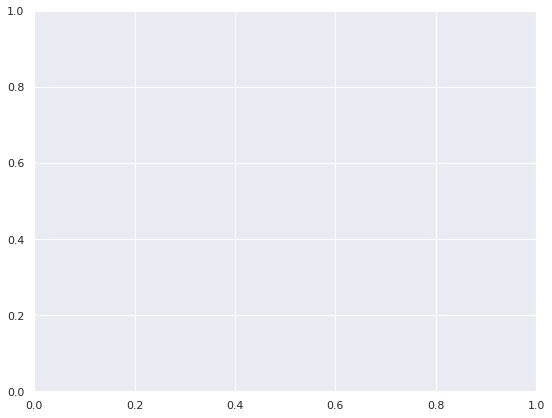

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

window = 10
avg = pd.DataFrame(np.array(runs_reward)).T.rolling(window).mean().T

df_reward_v2 = pd.DataFrame(avg).melt()
sns.lineplot(ax=ax, x='variable', y='value', data=df_reward_v2)
ax.set_title(f"Reward training curve over {runs} runs")
ax.set_ylabel(f"{window} episode moving average of mean agent\'s reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()